# MATH60005/70005: Optimisation Coursework - Part I
## Gradient-Enhanced Polynomial Regression

This notebook implements polynomial regression with and without gradient information.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Plotting settings
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## Part I.a) Standard Polynomial Regression

### Theory

We want to fit a polynomial model:
$$V_\theta(x) = \sum_{j=1}^{n} \theta_j \phi_j(x) = \theta^\top \Phi(x)$$

For the monomial basis: $\Phi(x) = (1, x, x^2, \ldots, x^{n-1})^\top$

The linear least squares formulation is:
$$\min_{\theta \in \mathbb{R}^n} \|A\theta - b\|_2^2$$

where:
- $A \in \mathbb{R}^{m \times n}$ with $A_{ij} = \phi_j(x_i)$ (design matrix)
- $b \in \mathbb{R}^m$ with $b_i = V(x_i)$ (target values)

In [2]:
def load_data_Ia(training_file, validation_file):
    """
    Load training and validation data for Part I.a
    Expected format: (x, V(x))
    """
    try:
        # Try loading with pandas first
        train_data = pd.read_csv(training_file, sep='\s+', header=None).values
        val_data = pd.read_csv(validation_file, sep='\s+', header=None).values
    except:
        # Fallback to numpy
        train_data = np.loadtxt(training_file)
        val_data = np.loadtxt(validation_file)
    
    x_train = train_data[:, 0]
    V_train = train_data[:, 1]
    x_val = val_data[:, 0]
    V_val = val_data[:, 1]
    
    return x_train, V_train, x_val, V_val

In [3]:
def create_design_matrix(x, n):
    """
    Create design matrix A for monomial basis up to degree n-1
    A[i, j] = x[i]^(j-1) for j = 1, ..., n
    
    Parameters:
    -----------
    x : array-like, shape (m,)
        Input points
    n : int
        Number of basis functions (polynomial degree is n-1)
    
    Returns:
    --------
    A : ndarray, shape (m, n)
        Design matrix
    """
    m = len(x)
    A = np.zeros((m, n))
    for j in range(n):
        A[:, j] = x ** j
    return A

In [4]:
def fit_polynomial(x_train, V_train, n):
    """
    Fit polynomial model using least squares
    
    Parameters:
    -----------
    x_train : array-like
        Training input points
    V_train : array-like
        Training target values
    n : int
        Number of basis functions
    
    Returns:
    --------
    theta : ndarray
        Fitted coefficients
    """
    A = create_design_matrix(x_train, n)
    b = V_train
    
    # Solve least squares problem: min ||A*theta - b||^2
    theta, residuals, rank, s = lstsq(A, b)
    
    return theta

In [5]:
def predict(x, theta):
    """
    Predict values using fitted polynomial
    
    Parameters:
    -----------
    x : array-like
        Input points
    theta : array-like
        Polynomial coefficients
    
    Returns:
    --------
    predictions : ndarray
        Predicted values
    """
    n = len(theta)
    A = create_design_matrix(x, n)
    return A @ theta

In [6]:
def compute_mse(x, V_true, theta):
    """
    Compute Mean Squared Error
    MSE = (1/m) * sum((V_theta(x_k) - V(x_k))^2)
    """
    V_pred = predict(x, theta)
    mse = np.mean((V_pred - V_true) ** 2)
    return mse

### Load Data and Analyze

In [8]:
# Load data
# Note: Replace these paths with the actual file paths
training_file_Ia = 'datasets/trainingIa.dat'
validation_file_Ia = 'datasets/validationIa.dat'

try:
    x_train, V_train, x_val, V_val = load_data_Ia(training_file_Ia, validation_file_Ia)
    print(f"Training data: {len(x_train)} points")
    print(f"Validation data: {len(x_val)} points")
    print(f"Training x range: [{x_train.min():.3f}, {x_train.max():.3f}]")
    print(f"Validation x range: [{x_val.min():.3f}, {x_val.max():.3f}]")
except FileNotFoundError:
    print("Data files not found. Please ensure 'trainingIa.dat' and 'validationIa.dat' are in the working directory.")
    print("Creating synthetic data for demonstration...")
    
    # Create synthetic data
    x_train = np.linspace(0, 1, 50)
    V_train = np.sin(2 * np.pi * x_train) + 0.1 * np.random.randn(50)
    x_val = np.linspace(0, 1, 30)
    V_val = np.sin(2 * np.pi * x_val)

Training data: 50 points
Validation data: 100 points
Training x range: [-1.918, 1.880]
Validation x range: [-1.972, 1.943]


### MSE vs Polynomial Degree

In [9]:
# Compute MSE for different polynomial degrees
degrees = range(1, 21)
mse_values = []
theta_dict = {}  # Store fitted parameters

for n in degrees:
    theta = fit_polynomial(x_train, V_train, n)
    theta_dict[n] = theta
    mse = compute_mse(x_val, V_val, theta)
    mse_values.append(mse)
    print(f"n = {n:2d}: MSE = {mse:.6e}")

mse_values = np.array(mse_values)

n =  1: MSE = 7.525381e+01
n =  2: MSE = 5.766286e+01
n =  3: MSE = 7.094817e+00
n =  4: MSE = 4.836887e+00
n =  5: MSE = 6.614912e-01
n =  6: MSE = 3.053355e-02
n =  7: MSE = 2.733737e-02
n =  8: MSE = 1.217972e-03
n =  9: MSE = 1.380623e-03
n = 10: MSE = 8.575890e-04
n = 11: MSE = 1.445501e-03
n = 12: MSE = 1.447317e-03
n = 13: MSE = 4.109388e-03
n = 14: MSE = 4.046806e-03
n = 15: MSE = 5.930873e-03
n = 16: MSE = 8.019987e-03
n = 17: MSE = 3.241879e-02
n = 18: MSE = 4.290732e-02
n = 19: MSE = 1.470289e-02
n = 20: MSE = 1.905778e-02


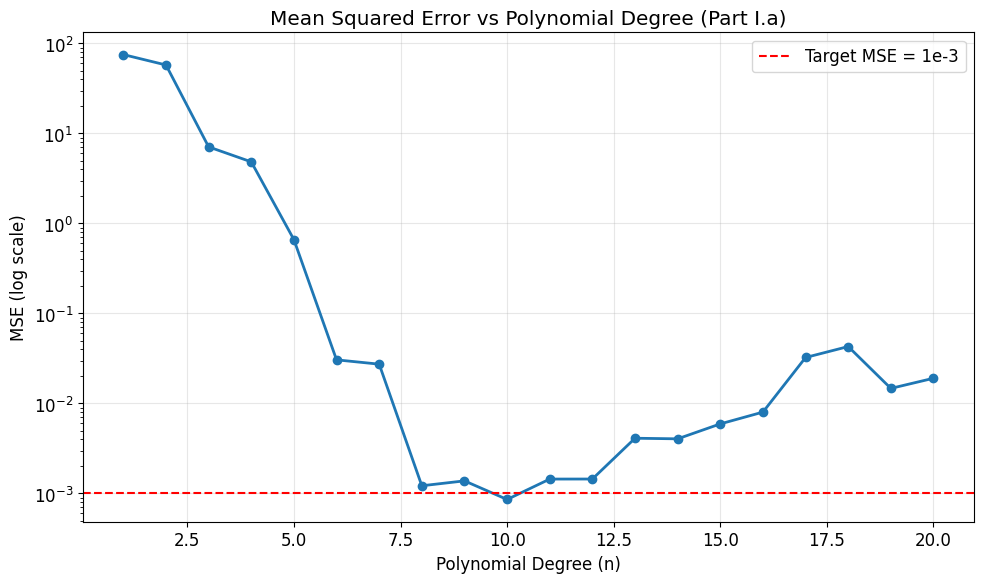


Smallest n achieving MSE < 1e-3: n = 10 (MSE = 8.575890e-04)


In [10]:
# Plot MSE vs degree
plt.figure(figsize=(10, 6))
plt.semilogy(degrees, mse_values, 'o-', linewidth=2, markersize=6)
plt.axhline(y=1e-3, color='r', linestyle='--', label='Target MSE = 1e-3')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('MSE (log scale)')
plt.title('Mean Squared Error vs Polynomial Degree (Part I.a)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Find smallest n achieving MSE < 1e-3
threshold = 1e-3
n_optimal = None
for i, (n, mse) in enumerate(zip(degrees, mse_values)):
    if mse < threshold:
        n_optimal = n
        print(f"\nSmallest n achieving MSE < 1e-3: n = {n_optimal} (MSE = {mse:.6e})")
        break

if n_optimal is None:
    print(f"\nNo degree in range achieved MSE < {threshold}")
    n_optimal = degrees[-1]

### MSE vs Number of Training Points

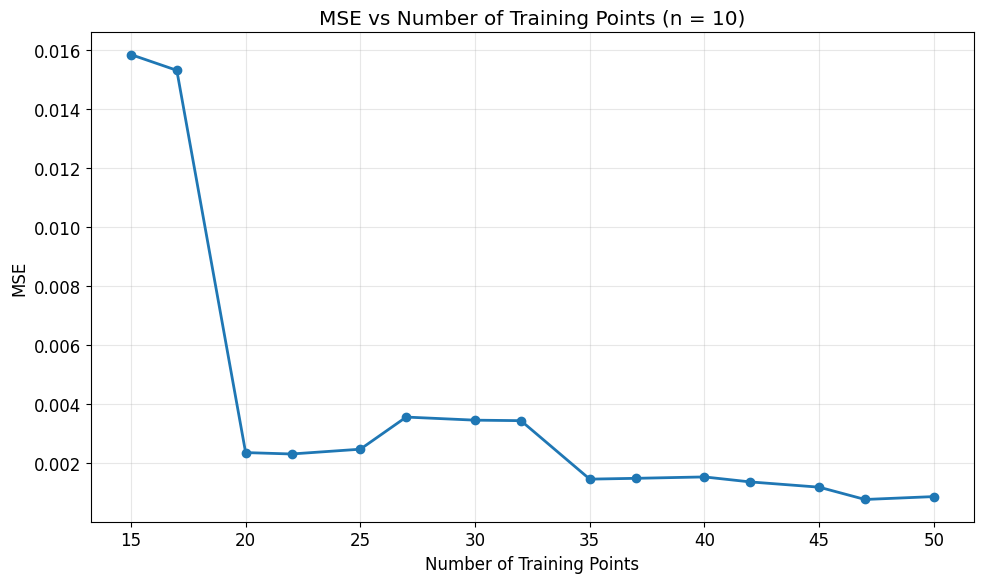

In [11]:
# Fix n at optimal value and vary number of training points
if n_optimal is not None:
    m_train = len(x_train)
    # Use different fractions of training data
    train_sizes = np.linspace(n_optimal + 5, m_train, 15, dtype=int)
    mse_vs_m = []
    
    for m in train_sizes:
        # Use first m training points
        theta = fit_polynomial(x_train[:m], V_train[:m], n_optimal)
        mse = compute_mse(x_val, V_val, theta)
        mse_vs_m.append(mse)
    
    # Plot MSE vs number of training points
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, mse_vs_m, 'o-', linewidth=2, markersize=6)
    plt.xlabel('Number of Training Points')
    plt.ylabel('MSE')
    plt.title(f'MSE vs Number of Training Points (n = {n_optimal})')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

### Visualize Learned Function

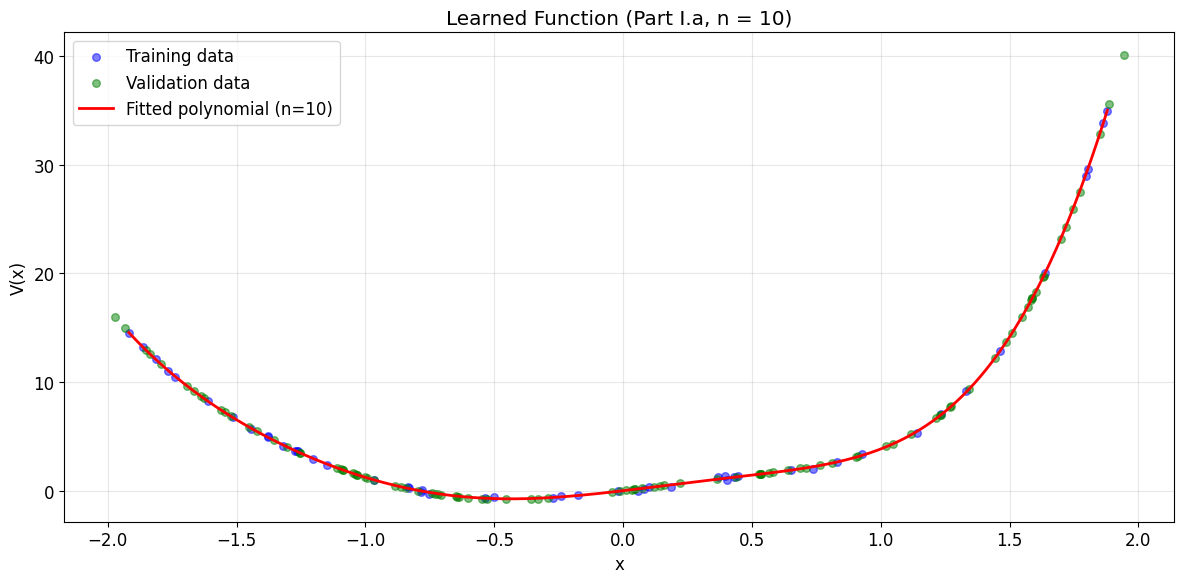

In [12]:
# Plot the learned function at optimal n
if n_optimal is not None:
    theta_optimal = theta_dict[n_optimal]
    
    # Create fine grid for plotting
    x_plot = np.linspace(x_train.min(), x_train.max(), 500)
    V_plot = predict(x_plot, theta_optimal)
    
    plt.figure(figsize=(12, 6))
    plt.scatter(x_train, V_train, alpha=0.5, s=30, label='Training data', color='blue')
    plt.scatter(x_val, V_val, alpha=0.5, s=30, label='Validation data', color='green')
    plt.plot(x_plot, V_plot, 'r-', linewidth=2, label=f'Fitted polynomial (n={n_optimal})')
    plt.xlabel('x')
    plt.ylabel('V(x)')
    plt.title(f'Learned Function (Part I.a, n = {n_optimal})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## Part I.b) Gradient-Enhanced Polynomial Regression

### Theory

Now we have enriched data: $\mathcal{D} = \{x_i, V(x_i), \nabla V(x_i)\}_{i=1}^m$

We need to fit both function values and derivatives. The gradient of $V_\theta(x)$ is:
$$\nabla V_\theta(x) = \sum_{j=1}^{n} \theta_j \nabla \phi_j(x) = \theta^\top \nabla\Phi(x)$$

For monomial basis in 1D: $\nabla \phi_j(x) = \frac{d}{dx}x^{j-1} = (j-1)x^{j-2}$

The augmented least squares problem becomes:
$$\min_{\theta \in \mathbb{R}^n} \left\|\begin{pmatrix} A \\ A_{\text{grad}} \end{pmatrix}\theta - \begin{pmatrix} b \\ b_{\text{grad}} \end{pmatrix}\right\|_2^2$$

where:
- $A_{\text{grad}}[i,j] = \nabla \phi_j(x_i) = (j-1)x_i^{j-2}$
- $b_{\text{grad}}[i] = \nabla V(x_i)$

In [13]:
def load_data_Ib(training_file):
    """
    Load training data with gradient information for Part I.b
    Expected format: (x, V(x), dV/dx(x))
    """
    try:
        train_data = pd.read_csv(training_file, sep='\s+', header=None).values
    except:
        train_data = np.loadtxt(training_file)
    
    x_train = train_data[:, 0]
    V_train = train_data[:, 1]
    dV_train = train_data[:, 2]
    
    return x_train, V_train, dV_train

In [14]:
def create_gradient_matrix(x, n):
    """
    Create gradient design matrix for monomial basis
    A_grad[i, j] = d/dx(x^(j-1)) = (j-1) * x[i]^(j-2)
    
    Parameters:
    -----------
    x : array-like, shape (m,)
        Input points
    n : int
        Number of basis functions
    
    Returns:
    --------
    A_grad : ndarray, shape (m, n)
        Gradient design matrix
    """
    m = len(x)
    A_grad = np.zeros((m, n))
    
    # First basis function (constant) has zero derivative
    A_grad[:, 0] = 0
    
    # For j >= 1: d/dx(x^j) = j * x^(j-1)
    for j in range(1, n):
        A_grad[:, j] = j * (x ** (j - 1))
    
    return A_grad

In [15]:
def fit_polynomial_with_gradients(x_train, V_train, dV_train, n):
    """
    Fit polynomial model using both function values and gradients
    
    Parameters:
    -----------
    x_train : array-like
        Training input points
    V_train : array-like
        Training function values
    dV_train : array-like
        Training gradient values
    n : int
        Number of basis functions
    
    Returns:
    --------
    theta : ndarray
        Fitted coefficients
    """
    # Create design matrices
    A_func = create_design_matrix(x_train, n)
    A_grad = create_gradient_matrix(x_train, n)
    
    # Stack matrices and target vectors
    A_augmented = np.vstack([A_func, A_grad])
    b_augmented = np.hstack([V_train, dV_train])
    
    # Solve augmented least squares problem
    theta, residuals, rank, s = lstsq(A_augmented, b_augmented)
    
    return theta

### Load Gradient-Enhanced Data and Analyze

In [17]:
# Load gradient-enhanced training data
training_file_Ib = 'datasets/trainingIb.dat'

try:
    x_train_grad, V_train_grad, dV_train_grad = load_data_Ib(training_file_Ib)
    print(f"Gradient-enhanced training data: {len(x_train_grad)} points")
    print(f"Training x range: [{x_train_grad.min():.3f}, {x_train_grad.max():.3f}]")
except FileNotFoundError:
    print("Gradient data file not found. Please ensure 'trainingIb.dat' is in the working directory.")
    print("Creating synthetic gradient data for demonstration...")
    
    # Create synthetic gradient data
    x_train_grad = x_train
    V_train_grad = V_train
    dV_train_grad = 2 * np.pi * np.cos(2 * np.pi * x_train_grad) + 0.1 * np.random.randn(len(x_train_grad))

Gradient-enhanced training data: 50 points
Training x range: [-1.918, 1.880]


### Compare Standard vs Gradient-Enhanced Regression

In [18]:
# Compute MSE for both methods
degrees = range(1, 21)
mse_standard = []
mse_gradient = []
theta_grad_dict = {}

for n in degrees:
    # Standard regression
    theta_std = fit_polynomial(x_train_grad, V_train_grad, n)
    mse_std = compute_mse(x_val, V_val, theta_std)
    mse_standard.append(mse_std)
    
    # Gradient-enhanced regression
    theta_grad = fit_polynomial_with_gradients(x_train_grad, V_train_grad, dV_train_grad, n)
    theta_grad_dict[n] = theta_grad
    mse_grad = compute_mse(x_val, V_val, theta_grad)
    mse_gradient.append(mse_grad)
    
    print(f"n = {n:2d}: Standard MSE = {mse_std:.6e}, Gradient-Enhanced MSE = {mse_grad:.6e}")

mse_standard = np.array(mse_standard)
mse_gradient = np.array(mse_gradient)

n =  1: Standard MSE = 7.525381e+01, Gradient-Enhanced MSE = 7.525381e+01
n =  2: Standard MSE = 5.766286e+01, Gradient-Enhanced MSE = 5.742869e+01
n =  3: Standard MSE = 7.094817e+00, Gradient-Enhanced MSE = 2.192029e+01
n =  4: Standard MSE = 4.836887e+00, Gradient-Enhanced MSE = 1.405679e+01
n =  5: Standard MSE = 6.614912e-01, Gradient-Enhanced MSE = 1.482185e+00
n =  6: Standard MSE = 3.053355e-02, Gradient-Enhanced MSE = 5.163536e-02
n =  7: Standard MSE = 2.733737e-02, Gradient-Enhanced MSE = 3.984630e-02
n =  8: Standard MSE = 1.217972e-03, Gradient-Enhanced MSE = 1.556689e-03
n =  9: Standard MSE = 1.380623e-03, Gradient-Enhanced MSE = 1.634626e-03
n = 10: Standard MSE = 8.575890e-04, Gradient-Enhanced MSE = 6.254903e-04
n = 11: Standard MSE = 1.445501e-03, Gradient-Enhanced MSE = 8.768350e-04
n = 12: Standard MSE = 1.447317e-03, Gradient-Enhanced MSE = 8.428545e-04
n = 13: Standard MSE = 4.109388e-03, Gradient-Enhanced MSE = 8.359754e-04
n = 14: Standard MSE = 4.046806e-03, G

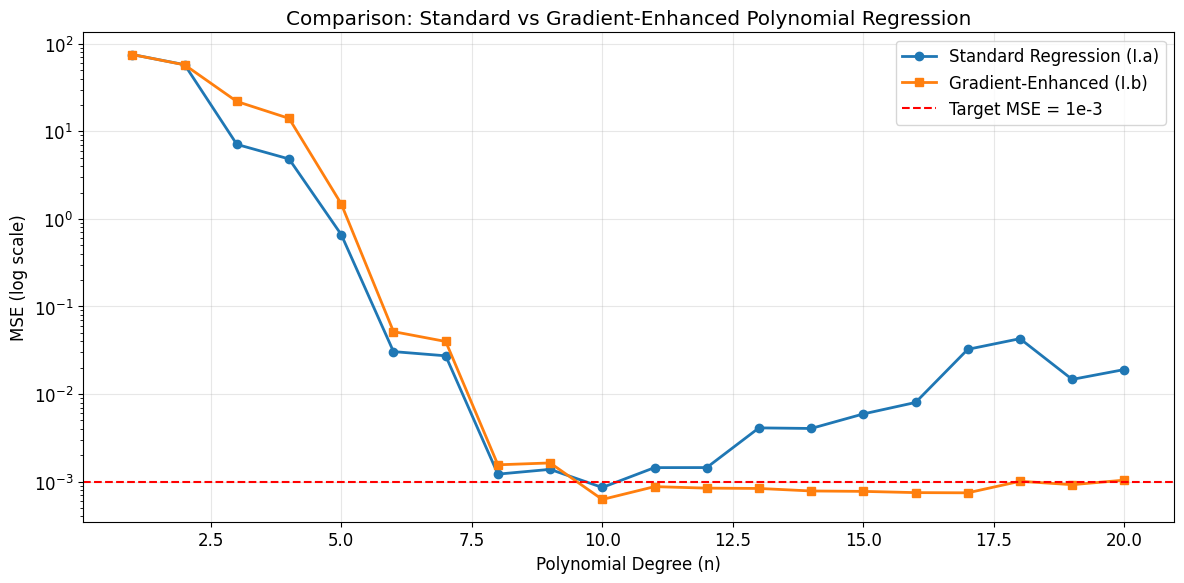


Gradient-Enhanced: Smallest n achieving MSE < 1e-3: n = 10 (MSE = 6.254903e-04)


In [19]:
# Plot comparison
plt.figure(figsize=(12, 6))
plt.semilogy(degrees, mse_standard, 'o-', linewidth=2, markersize=6, label='Standard Regression (I.a)')
plt.semilogy(degrees, mse_gradient, 's-', linewidth=2, markersize=6, label='Gradient-Enhanced (I.b)')
plt.axhline(y=1e-3, color='r', linestyle='--', label='Target MSE = 1e-3')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('MSE (log scale)')
plt.title('Comparison: Standard vs Gradient-Enhanced Polynomial Regression')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Find smallest n achieving MSE < 1e-3 for gradient-enhanced
threshold = 1e-3
n_optimal_grad = None
for i, (n, mse) in enumerate(zip(degrees, mse_gradient)):
    if mse < threshold:
        n_optimal_grad = n
        print(f"\nGradient-Enhanced: Smallest n achieving MSE < 1e-3: n = {n_optimal_grad} (MSE = {mse:.6e})")
        break

if n_optimal_grad is None:
    print(f"\nNo degree in range achieved MSE < {threshold}")
    n_optimal_grad = degrees[-1]

### Visualize Gradient-Enhanced Learned Function

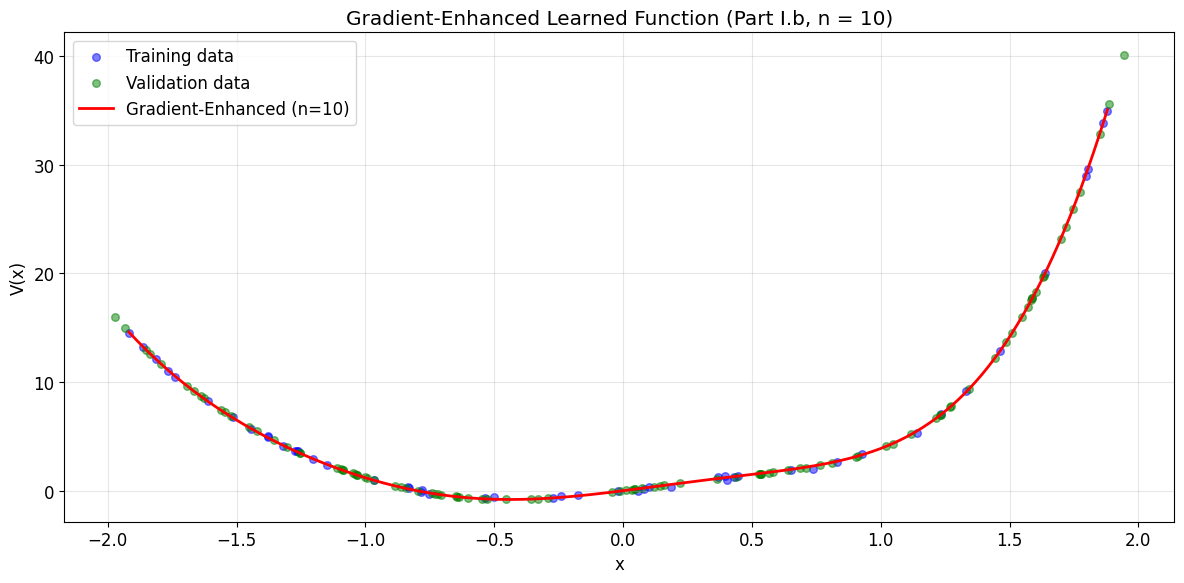

In [20]:
# Plot the learned function with gradient enhancement
if n_optimal_grad is not None:
    theta_optimal_grad = theta_grad_dict[n_optimal_grad]
    
    # Create fine grid for plotting
    x_plot = np.linspace(x_train_grad.min(), x_train_grad.max(), 500)
    V_plot_grad = predict(x_plot, theta_optimal_grad)
    
    plt.figure(figsize=(12, 6))
    plt.scatter(x_train_grad, V_train_grad, alpha=0.5, s=30, label='Training data', color='blue')
    plt.scatter(x_val, V_val, alpha=0.5, s=30, label='Validation data', color='green')
    plt.plot(x_plot, V_plot_grad, 'r-', linewidth=2, label=f'Gradient-Enhanced (n={n_optimal_grad})')
    plt.xlabel('x')
    plt.ylabel('V(x)')
    plt.title(f'Gradient-Enhanced Learned Function (Part I.b, n = {n_optimal_grad})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

### Observations and Analysis

In [21]:
print("="*70)
print("SUMMARY OF RESULTS")
print("="*70)
print("\nPart I.a (Standard Regression):")
if n_optimal is not None:
    print(f"  - Optimal polynomial degree: n = {n_optimal}")
    print(f"  - MSE at optimal n: {mse_values[n_optimal-1]:.6e}")

print("\nPart I.b (Gradient-Enhanced Regression):")
if n_optimal_grad is not None:
    print(f"  - Optimal polynomial degree: n = {n_optimal_grad}")
    print(f"  - MSE at optimal n: {mse_gradient[n_optimal_grad-1]:.6e}")

print("\nObservations:")
print("""
1. Gradient-enhanced regression typically achieves lower MSE with smaller polynomial degrees
2. Including derivative information provides additional constraints that improve fitting
3. The augmented system effectively doubles the amount of information per data point
4. Gradient-enhanced methods can reduce overfitting and improve generalization
5. The method is particularly effective when derivatives are reliably measured
""")
print("="*70)

SUMMARY OF RESULTS

Part I.a (Standard Regression):
  - Optimal polynomial degree: n = 10
  - MSE at optimal n: 8.575890e-04

Part I.b (Gradient-Enhanced Regression):
  - Optimal polynomial degree: n = 10
  - MSE at optimal n: 6.254903e-04

Observations:

1. Gradient-enhanced regression typically achieves lower MSE with smaller polynomial degrees
2. Including derivative information provides additional constraints that improve fitting
3. The augmented system effectively doubles the amount of information per data point
4. Gradient-enhanced methods can reduce overfitting and improve generalization
5. The method is particularly effective when derivatives are reliably measured

